In [37]:
#Load the dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import style



In [38]:
plt.style.use('bmh')

In [39]:
style.use('ggplot')

In [40]:
#Load the data and Store the data into a data frame
df=pd.read_csv('/content/drive/MyDrive/TSLA.csv')

In [41]:
print (df.head(25))

          Date       Open       High        Low      Close  Adj Close  \
0   2010-06-29  19.000000  25.000000  17.540001  23.889999  23.889999   
1   2010-06-30  25.790001  30.420000  23.299999  23.830000  23.830000   
2   2010-07-01  25.000000  25.920000  20.270000  21.959999  21.959999   
3   2010-07-02  23.000000  23.100000  18.709999  19.200001  19.200001   
4   2010-07-06  20.000000  20.000000  15.830000  16.110001  16.110001   
5   2010-07-07  16.400000  16.629999  14.980000  15.800000  15.800000   
6   2010-07-08  16.139999  17.520000  15.570000  17.459999  17.459999   
7   2010-07-09  17.580000  17.900000  16.549999  17.400000  17.400000   
8   2010-07-12  17.950001  18.070000  17.000000  17.049999  17.049999   
9   2010-07-13  17.389999  18.639999  16.900000  18.139999  18.139999   
10  2010-07-14  17.940001  20.150000  17.760000  19.840000  19.840000   
11  2010-07-15  19.940001  21.500000  19.000000  19.889999  19.889999   
12  2010-07-16  20.700001  21.299999  20.049999  20

In [42]:

x=df[['High','Open', 'Low', 'Volume']].values
y=df['Close'].values



In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [44]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred = regressor.predict(x_test)
result = pd.DataFrame({"Actual" :y_test. flatten(), "Predicted":y_pred.flatten()})
result.head (25)

,Actual,Predicted
0,207.729996,211.933274
1,28.280001,28.343446
2,24.010000,23.967470
3,315.230011,326.638890
4,200.240005,197.999511
5,210.240005,209.841431
6,26.440001,26.570540
7,22.790001,24.115965
8,224.839996,218.550465
9,353.179993,350.599448


In [46]:

import math

In [47]:

graph = result.head(20)

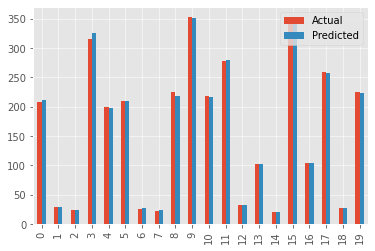

In [48]:
graph.plot(kind='bar')

In [49]:
#Get the number of trading days
df.shape

(2416, 7)

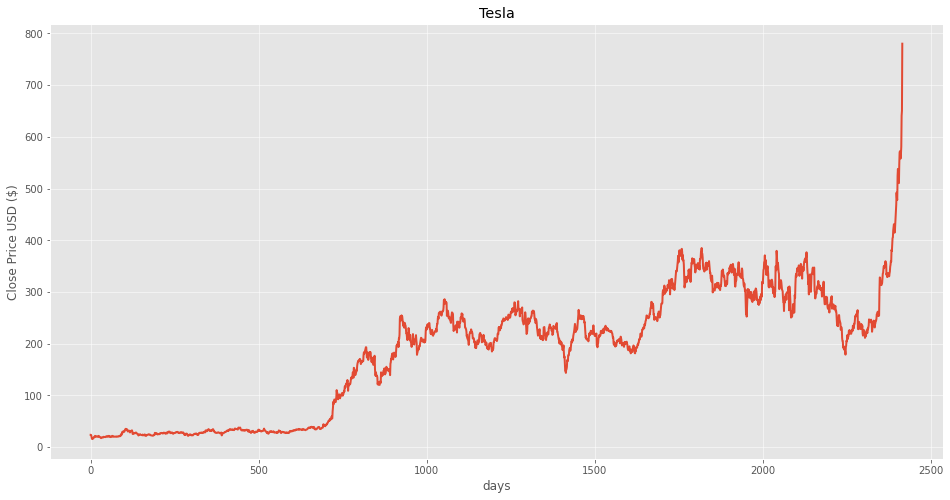

In [50]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [51]:
#Get the close price
df-df[["Close"]]
df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800


In [65]:
#Create a variable to predict 'x' days out into the future
future_days=25
df['Prediction']=df[["Close"]].shift(- future_days)
df.tail(4)

,Open,High,Low,Close,Adj Close,Volume,Prediction
2412,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,NaN
2413,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,NaN
2414,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,NaN
2415,673.690002,786.140015,673.520020,780.000000,780.000000,47065000,NaN


In [53]:
#Create the feature date set (X) and convert it to a numpy array and remove the Last 'x' rous/desy
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[['2010-06-29' 19.0 25.0 ... 23.889999 23.889999 18766300]
 ['2010-06-30' 25.790001 30.42 ... 23.83 23.83 17187100]
 ['2010-07-01' 25.0 25.92 ... 21.959999 21.959999 8218800]
 ...
 ['2019-12-23' 411.779999 422.01001 ... 419.220001 419.220001 13319600]
 ['2019-12-24' 418.359985 425.470001 ... 425.25 425.25 8054700]
 ['2019-12-26' 427.910004 433.480011 ... 430.940002 430.940002 10633900]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [54]:

#Create the target date set (y) and convert it to a numpy array and get all the target values except the last 's rous/days
y=np.array(df['Prediction'])[:-future_days]
print(y)


[       nan        nan        nan ... 352.170013 349.98999  359.519989]


In [62]:
#split the data into s training and 25% testing
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.25)

In [63]:
#Get the Last 'x' rows of the feature data set
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[3.60000000e+02, 3.61200012e+02, 3.49570007e+02, 3.52220001e+02,
        3.52220001e+02, 6.72510000e+06],
       [3.54510010e+02, 3.60839996e+02, 3.54000000e+02, 3.54829987e+02,
        3.54829987e+02, 6.11000000e+06],
       [3.40160004e+02, 3.41000000e+02, 3.30000000e+02, 3.33040009e+02,
        3.33040009e+02, 1.68706000e+07],
       [3.44320007e+02, 3.44570007e+02, 3.34459991e+02, 3.36339996e+02,
        3.36339996e+02, 1.23395000e+07],
       [3.35269989e+02, 3.35500000e+02, 3.27100006e+02, 3.28920013e+02,
        3.28920013e+02, 7.94740000e+06],
       [3.31119995e+02, 3.33929993e+02, 3.28570007e+02, 3.31290009e+02,
        3.31290009e+02, 5.55560000e+06],
       [3.31109985e+02, 3.31260010e+02, 3.27500000e+02, 3.29940002e+02,
        3.29940002e+02, 2.46560000e+06],
       [3.29399994e+02, 3.36380005e+02, 3.28690002e+02, 3.34869995e+02,
        3.34869995e+02, 6.07450000e+06],
       [3.32619995e+02, 3.37910004e+02, 3.32190002e+02, 3.36200012e+02,
        3.36200012e+02, 

In [57]:
df = df.drop(columns=['Date'])

In [60]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Prediction
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300,NaN
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100,NaN
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800,NaN
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800,NaN
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900,NaN


In [66]:
#Create the models
#Create the decision tree regressor model
lr = LinearRegression().fit(x_train, y_train)


ValueError: ignored

In [59]:
#show the model Linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

NameError: ignored

In [50]:
#visualize the date
predictions = lr_prediction
valid=df[X.shape[0]:]
valid['Prediction']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('close Price Usd ($)')
plt.plot(df["Close"])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

NameError: ignored